# Keras API project : Loans 

### The goal

We aim to develop a model that can forecast if a borrower will repay their loan using past data on loans issued along with information about whether or not the borrower defaulted (charge-off). By doing this, we will be able to determine whether or not a prospective customer will be able to repay the loan in the future. 
The column 'loan_status' is used as our label.

### The dataset 

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## 1. Imports and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
feat_info('mort_acc')

Number of mortgage accounts.


In [5]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## 2. Exploring and analysing the data 

###### Here we can see how many have paid the loan fully 

<AxesSubplot: xlabel='loan_status', ylabel='count'>

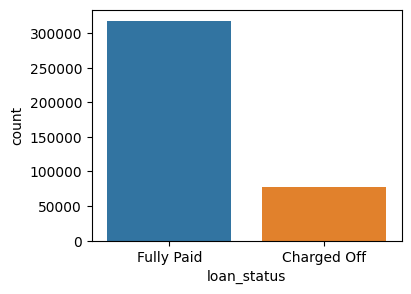

In [7]:
plt.figure(figsize=(4,3))
sns.countplot(x='loan_status',data=df)

###### Here we can see the different loan amounts

(0.0, 45000.0)

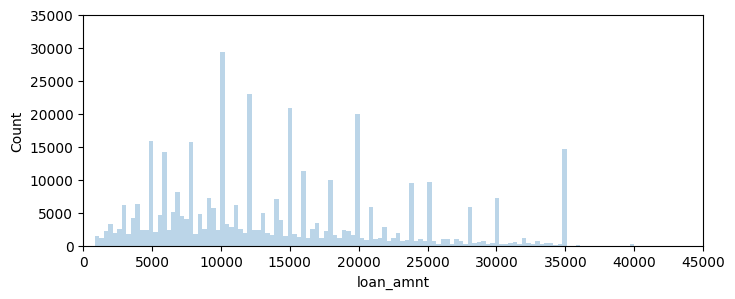

In [8]:
plt.figure(figsize=(8,3))
sns.histplot(x='loan_amnt',data=df,alpha=0.3,edgecolor=None)
plt.ylim(0,35000)
plt.xlim(0,45000)

###### Now we look at the correlations between the continious feature variables :

In [9]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


##### We, then, create a heatmap of said correlaions to visualise better : 

(10.0, 0.0)

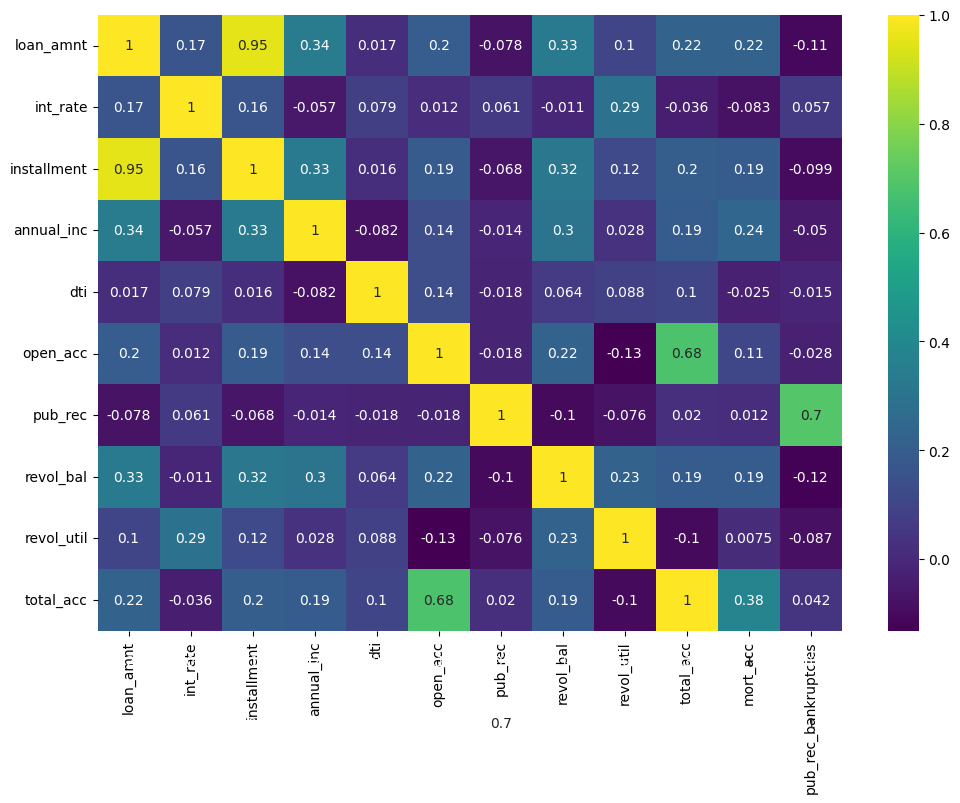

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),cmap="viridis" , annot=True)
plt.ylim(10, 0)

##### From the heatmap it is clear that there is a strong correlation between the 'loan_amnt' and the 'installment' features
##### We explore that further as we want to make sure that we are not accidentally leaking data from our features into our label :

-> In other words , we want to make sure we do not include a feature that is a perfect predictor of our label <-

In [11]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [12]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


We can now understand why these two features are so highly correlated. It would make sense that the expected monthly payment is correlated with the overall loan amount. We can assume that there is some type of function that defines the monthly payment amount based on the loan amount. The correlation between the two can further be explored in the following graph :

<AxesSubplot: xlabel='installment', ylabel='loan_amnt'>

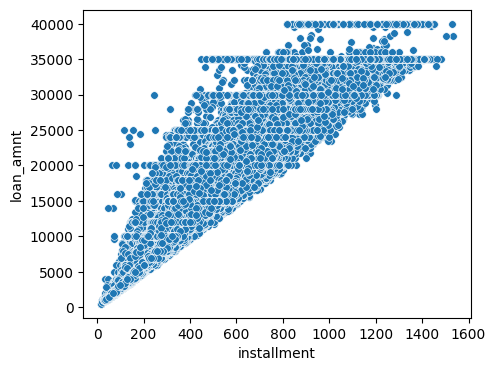

In [13]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='installment',y='loan_amnt',data=df,s=30)

##### Next we want to explore the relationship between the Loan Status and the Loan Amount - Is it possible that higher loans are less likely to be fully paid back ?

We can see from the following graph that, although there is a slight difference, there doesn't seem to be any significant correlation between the loan amount and the likelyhood of it being paid back fully by the borrower

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

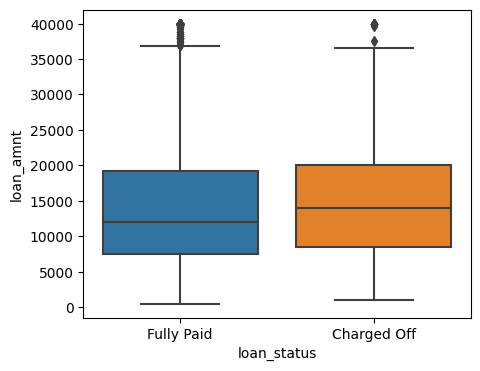

In [14]:
plt.figure(figsize=(5,4))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

We can explore this even further by looking at the summary statistics :

In [15]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


##### We now want to look into the Grade and SubGrade columns assigned by the Lending Club

In [18]:
feat_info('grade')

LC assigned loan grade


In [16]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
feat_info('sub_grade')

LC assigned loan subgrade


In [17]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

###### We want to explore wether there is a correlation between the grade/subgrade assigned and the likely of the loan being fully paid

From the following graph we can see that there is - higher grades have higher possibility to be paid off -

<AxesSubplot: xlabel='grade', ylabel='count'>

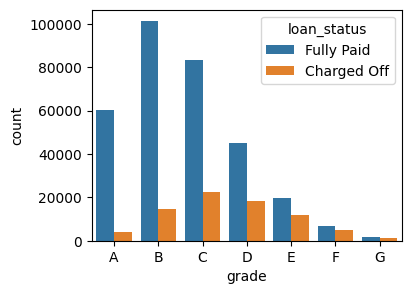

In [33]:
plt.figure(figsize=(4,3))
grade_sorted = sorted(df['grade'].unique())
sns.countplot(x='grade',hue='loan_status',data=df,order=grade_sorted)

We can explore this further by first looking into how many customers we have in each subgrade : 

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

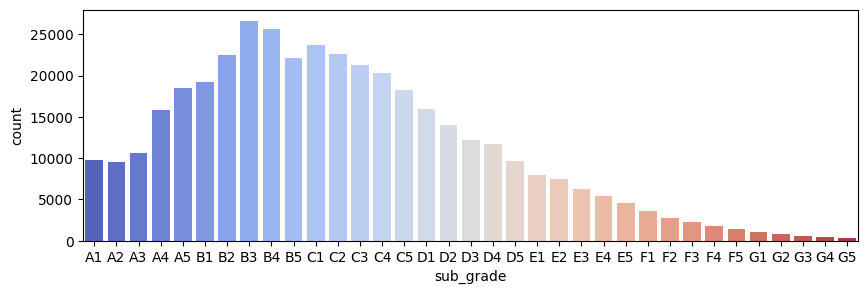

In [34]:
plt.figure(figsize=(10,3))
subgrade_sorted=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df , order=subgrade_sorted, palette='coolwarm')

And now we can also add the loan status info to compare all the subgrades :

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

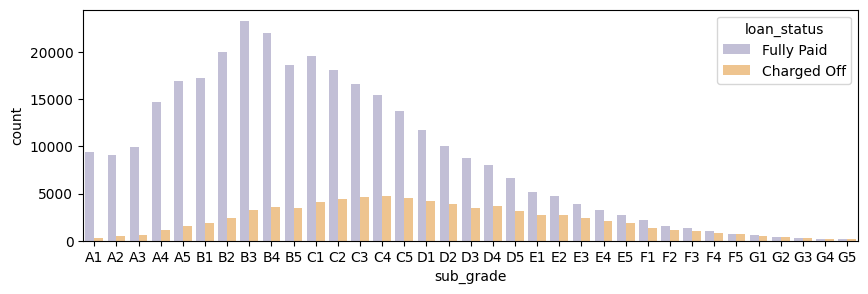

In [35]:
plt.figure(figsize=(10,3))
sns.countplot(x='sub_grade',hue='loan_status',data=df, order=subgrade_sorted, palette='PuOr_r')

We can see that the subgrades F and G are the least likely to be paid back, we can see that even more clearly when we isolate them : 

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

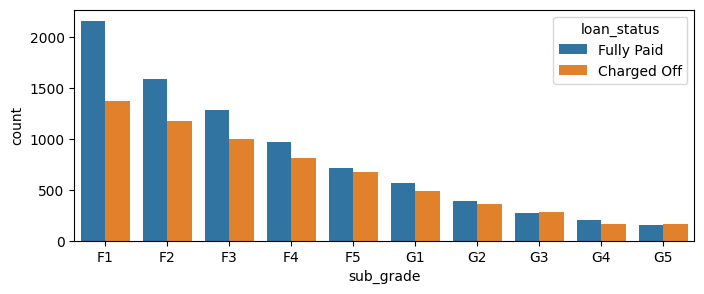

In [36]:
f_and_g =  df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(8,3))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

### We now want to change our label column from strings ( 'Fully paid' / 'Charged Off' ) into 1s and 0s

In [37]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [38]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [39]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


#### For this new column we want to check its correlation with the rest of the numeric features :

We can see that interest rate has the highest negative correlation which makes sense - maybe a higher interset rate means it is harder to pay back the loan

<AxesSubplot: >

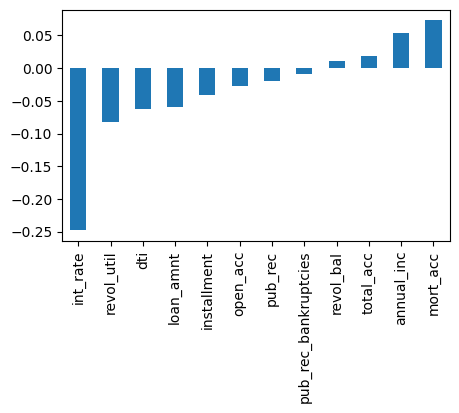

In [41]:
plt.figure(figsize=(5,3))
df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values().plot(kind='bar')

## 3 . Data Preprocessing

In [43]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


### 3.1 Missing Data 
#### keep / discard / fill

In [47]:
len(df)

396030

Checking for null values in each column :

In [45]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

We can also see it as a percentage to understand how signifiant is the amount of missing data per column :

In [46]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

##### From the above we can see that we need to further explore the columns emp_title , emp_length , title , mort_acc , revol_util and the pub_rec_bankruptcies  

We will first explore emp_title and  emp_length to check wether we could drop them :

In [48]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


###### How many different employment titles are there ?

In [49]:
df['emp_title'].nunique()

173105

In [50]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

That seems to be way to many to have any significant impact on the outcome and would be ineficient and turn them into dummy variables , therefor we can drop this column :

In [51]:
df = df.drop('emp_title',axis=1)

###### We now explore the employment length column. How many unique values does it have ? How many borrowers per category ?

In [52]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot: xlabel='emp_length', ylabel='count'>

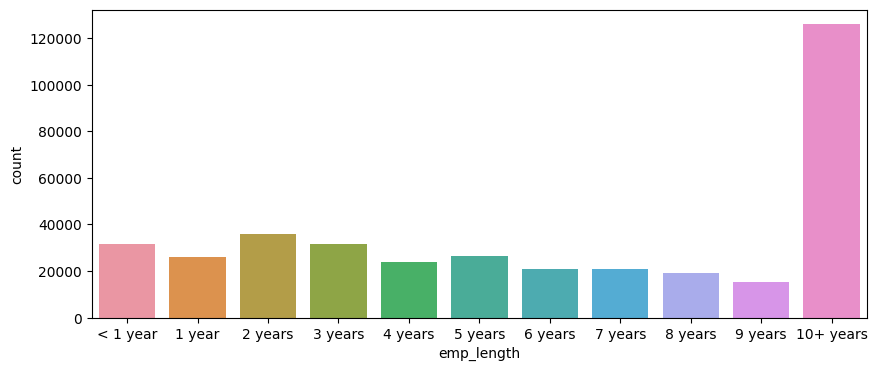

In [53]:
emp_order = [ '< 1 year',
            '1 year',
            '2 years',
            '3 years',
            '4 years',
            '5 years',
            '6 years',
            '7 years',
            '8 years',
            '9 years',
            '10+ years']


plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=emp_order)

We can create the same plot but also add in the info of loan status : 

<AxesSubplot: xlabel='emp_length', ylabel='count'>

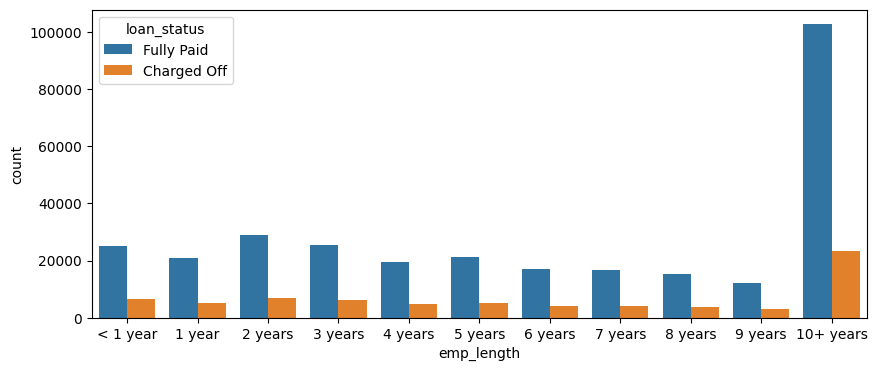

In [54]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=emp_order,hue='loan_status')

This still does not help us understand if there is some type of correlation between employment years and the loan status. What we need to figure this out is the percentage of charge offs per category. Basically this will inform us what percent of people per employment category didn't pay back their loan. 

In [55]:
emp_charged_off = df[df['loan_status']=="Charged Off"].groupby('emp_length').count()['loan_status']

In [56]:
emp_fully_paid = df[df['loan_status']=="Fully Paid"].groupby('emp_length').count()['loan_status']

In [57]:
emp_len = emp_charged_off/emp_fully_paid

In [58]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

From this info (better demonstrated in the plot bellow) we can see that the charge off rates are pretty similar across all employment lengths therefore we can drop this column as well

<AxesSubplot: xlabel='emp_length'>

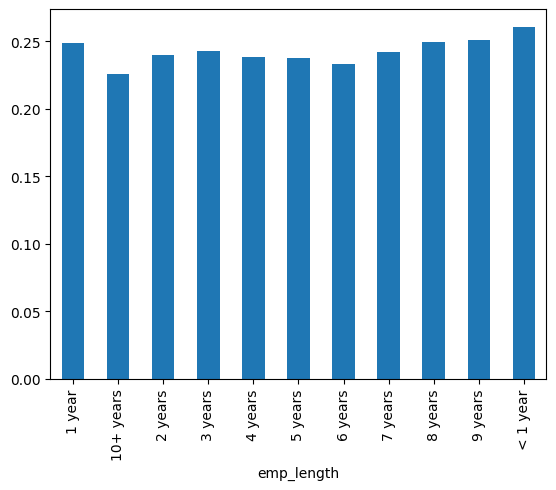

In [59]:
emp_len.plot(kind='bar')

In [60]:
df = df.drop('emp_length',axis=1)

##### We now move to the title column 

In [61]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

If we also check the 'purpose' column we will realise that the 'title' column is basically the same, therefore we go ahead and drop it as it does have some missing values ('purpose' does not)

In [62]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [63]:
df = df.drop('title',axis=1)

###### We now move on to the mort_account column 

In [64]:
feat_info('mort_acc')

Number of mortgage accounts.


In [65]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In order to fill those missing values we want to find the column that most correlates to mort_acc : 

In [66]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

 We can see that the total_acc feature correlates the most with the mort_acc 

In [67]:
df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

We will now fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [68]:
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

In [70]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [71]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

###### Lastly , we can see that revol_util and the pub_rec_bankruptcies also have missing data points, however they account for less than 0.5% of the total data. For this reason we can simply remove the rows that have missing data in the remaining columns

In [72]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [73]:
df=df.dropna()

In [74]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### 3.2 Categorical into dummy variables
#### converting strings into numeric values 

We first list all the columns that are non-numeric

In [75]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

###### we now explore each one seperately

### term column

In [76]:
df['term']=df['term'].map({' 36 months':36, ' 60 months':60})

In [77]:
df['term'].unique()

array([36, 60], dtype=int64)

### grade and sub_grade columns

Since it basically included in the subgrade column we can just go ahead and remove this one 

In [78]:
df=df.drop('grade',axis=1)

And now we convert the subgrade column into dummy variables , drop the column itself and add the dummy variables to the dataframe

In [79]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [80]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [81]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, application_type, initial_list_status, purpose columns

Similarly we convert these to dummy variables, add them to the dataframe and drop the original columns 

In [83]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [84]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership columns

In [85]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We do the same as previously with the addition of replacing NONE and ANY with OTHER

In [86]:
df['home_ownership'] = df['home_ownership'].replace(["NONE","ANY"],"OTHER")

In [88]:
ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),ownership_dummies],axis=1)

### address column 

############################## TEXT

In [89]:
df['zip_code'] = df['address'].apply(lambda address : address[-5:] )

In [90]:
df['zip_code'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: zip_code, dtype: object

In [91]:
zip_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,zip_dummies],axis=1)

In [92]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### issue_d column

This column would be data leakage. We wouldn't know beforehand whether or not a loan would be issued when using our model as the purpose of the model is to decide exactly that. For this reason we can drop this column.

In [97]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line column

This appears to be a historical time stamp feature. We canextract the year from this feature then convert it to a numeric feature and drop the original earliest_cr_line column

In [ ]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

### loan_status column

now, as we can see bellow, the only non-numeric column is the 'loan_status'

In [98]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

we can drop this one as it is basically the same as the loan_repaid column that we created previously

In [100]:
df = df.drop('loan_status',axis=1)

## 4. Train-Test Split 

In [99]:
from sklearn.model_selection import train_test_split

##### Now we set our input X as all columns minus the label column (loan_repaid) 
##### And we set our output y (labels) as the loan_repaid column

In [111]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## 5. Normalising the Data 

In [113]:
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler = MinMaxScaler()

In [115]:
X_train = scaler.fit_transform(X_train)

In [116]:
X_test = scaler.transform(X_test)

## 6. Creating the Model

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [118]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [119]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2991 - val_loss: 0.2652
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2652 - val_loss: 0.2640
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2629 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2618 - val_loss: 0.2620
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2611 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2604 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2601 - val_loss: 0.2622
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2596 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2593 - val_loss: 0.2611
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.258

In [120]:
from tensorflow.keras.models import load_model

In [121]:
model.save('loan_model.h5') 

## 7. Evaluating the model

In [122]:
losses = pd.DataFrame(model.history.history)

In [123]:
losses.columns

Index(['loss', 'val_loss'], dtype='object')

##### We can now plot the validation loss versus the training loss : 

<AxesSubplot: >

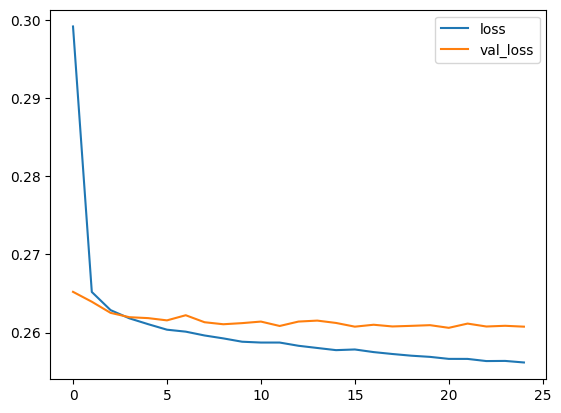

In [124]:
losses.plot()

We can now use the X_test set to create predictions :

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


##### Classification report :

In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



##### Confusion matrix :

In [128]:
print(confusion_matrix(y_test,predictions))

[[ 6863  8795]
 [  102 63284]]
